# Road Safety Data for the UK

# Table of Contents
<a id='Table of Contents'></a>

### <a href='#1. Obtaining and Viewing the Data'>1. Obtaining and Viewing the Data</a>

### <a href='#2. Preprocessing the Data'>2. Preprocessing the Data</a>

* <a href='#2.1. Handling Date and Time'>2.1. Handling Date and Time</a>
* <a href='#2.2. Handling Missing Values'>2.2. Handling Missing Values</a>
* <a href='#2.3. Merging Dataframes'>2.3. Merging Dataframes</a>
* <a href='#2.4. Handling Numerical Data'>2.4. Handling Numerical Data</a>
* <a href='#2.5. Handling Categorical Data'>2.5. Handling Categorical Data</a>

### <a href='#3. Modeling the Data'>3. Modeling the Data</a>

* <a href='#3.1. Train-Test-Split'>3.1. Train-Test-Split</a>
* <a href='#3.2. Handling Imbalanced Classes'>3.2. Handling Imbalanced Classes</a>
* <a href='#3.3. Training and Evaluating Random Forest Classifier with class_weight'>3.3. Training and Evaluating Random Forest Classifier with class_weight</a>
* <a href='#3.4. Training and Evaluating Random Forest Classifier with SMOTE'>3.4. Training and Evaluating Random Forest Classifier with SMOTE</a>

### 1. Obtaining and Viewing the Data
<a id='1. Obtaining and Viewing the Data'></a>

In [1]:
# import the usual suspects ...
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns

# suppress all warnings
import warnings
warnings.filterwarnings("ignore")

> **Accidents**

In [2]:
accidents = pd.read_csv('Accident_Information.csv')
print('Records:', accidents.shape[0], '\nColumns:', accidents.shape[1])
accidents.head()

Records: 2047256 
Columns: 34


,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,None,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,None,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-10,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,2005,No


In [3]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047256 entries, 0 to 2047255
Data columns (total 34 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Accident_Index                               object 
 1   1st_Road_Class                               object 
 2   1st_Road_Number                              float64
 3   2nd_Road_Class                               object 
 4   2nd_Road_Number                              float64
 5   Accident_Severity                            object 
 6   Carriageway_Hazards                          object 
 7   Date                                         object 
 8   Day_of_Week                                  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  float64
 10  Junction_Control                             object 
 11  Junction_Detail                              object 
 12  Latitude                                     float64
 13  Light_Condit

In [4]:
accidents.describe().T

,count,mean,std,min,25%,50%,75%,max
1st_Road_Number,2047254.0,992.105099,1809.407936,0.000000,0.000000,118.000000,702.000000,9.999000e+03
2nd_Road_Number,2029663.0,372.815342,1287.796383,0.000000,0.000000,0.000000,0.000000,9.999000e+03
Did_Police_Officer_Attend_Scene_of_Accident,2046978.0,1.202319,0.408194,1.000000,1.000000,1.000000,1.000000,3.000000e+00
Latitude,2047082.0,52.559780,1.445506,49.912941,51.485404,52.237583,53.455901,6.075754e+01
Location_Easting_OSGR,2047092.0,441446.210036,95496.198208,64950.000000,378063.500000,443050.000000,524298.250000,6.555400e+05
Location_Northing_OSGR,2047092.0,296885.465668,160527.257527,10290.000000,177756.750000,261183.500000,395610.000000,1.208800e+06
Longitude,2047081.0,-1.410155,1.403532,-7.516225,-2.329610,-1.362233,-0.205260,1.762010e+00
Number_of_Casualties,2047256.0,1.345843,0.817963,1.000000,1.000000,1.000000,1.000000,9.300000e+01
Number_of_Vehicles,2047256.0,1.833525,0.715054,1.000000,1.000000,2.000000,2.000000,6.700000e+01
Pedestrian_Crossing-Human_Control,2044336.0,0.010417,0.135113,0.000000,0.000000,0.000000,0.000000,2.000000e+00


In [5]:
accidents.isna().sum()

Accident_Index                                      0
1st_Road_Class                                      0
1st_Road_Number                                     2
2nd_Road_Class                                 844272
2nd_Road_Number                                 17593
Accident_Severity                                   0
Carriageway_Hazards                                 0
Date                                                0
Day_of_Week                                         0
Did_Police_Officer_Attend_Scene_of_Accident       278
Junction_Control                                    0
Junction_Detail                                     0
Latitude                                          174
Light_Conditions                                    0
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
Location_Easting_OSGR                             164
Location_Northing_OSGR                            164
Longitude                   

**Vehicles**

In [6]:
vehicles = pd.read_csv('Vehicle_Information.csv', encoding='ISO-8859-1')
print('Records:', vehicles.shape[0], '\nColumns:', vehicles.shape[1])
vehicles.head()

Records: 2177205 
Columns: 24


,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
0,200401BS00001,26 - 35,3.0,Urban area,4.0,1588.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
1,200401BS00002,26 - 35,NaN,Urban area,3.0,NaN,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,109,Data missing or out of range,Front,2004
2,200401BS00003,26 - 35,4.0,Data missing or out of range,NaN,998.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Turning right,1,109,Data missing or out of range,Front,2004
3,200401BS00003,66 - 75,NaN,Data missing or out of range,NaN,NaN,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
4,200401BS00004,26 - 35,1.0,Urban area,4.0,124.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,Data missing or out of range,Front,2004


In [7]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2177205 entries, 0 to 2177204
Data columns (total 24 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Accident_Index                    object 
 1   Age_Band_of_Driver                object 
 2   Age_of_Vehicle                    float64
 3   Driver_Home_Area_Type             object 
 4   Driver_IMD_Decile                 float64
 5   Engine_Capacity_.CC.              float64
 6   Hit_Object_in_Carriageway         object 
 7   Hit_Object_off_Carriageway        object 
 8   Journey_Purpose_of_Driver         object 
 9   Junction_Location                 object 
 10  make                              object 
 11  model                             object 
 12  Propulsion_Code                   object 
 13  Sex_of_Driver                     object 
 14  Skidding_and_Overturning          object 
 15  Towing_and_Articulation           object 
 16  Vehicle_Leaving_Carriageway       ob

In [8]:
vehicles.describe().T

,count,mean,std,min,25%,50%,75%,max
Age_of_Vehicle,1819056.0,7.108167,4.725886,1.0,3.0,7.0,10.0,111.0
Driver_IMD_Decile,1442393.0,5.387559,2.821651,1.0,3.0,5.0,8.0,10.0
Engine_Capacity_.CC.,1911344.0,2042.233961,1950.143170,1.0,1299.0,1598.0,1997.0,96000.0
Vehicle_Location.Restricted_Lane,2175888.0,0.107304,0.879964,0.0,0.0,0.0,0.0,9.0
Vehicle_Reference,2177205.0,1.553405,0.775248,1.0,1.0,1.0,2.0,91.0
Year,2177205.0,2010.934147,3.694375,2004.0,2008.0,2011.0,2014.0,2016.0


In [9]:
vehicles.isna().sum()

Accident_Index                           0
Age_Band_of_Driver                       0
Age_of_Vehicle                      358149
Driver_Home_Area_Type                    0
Driver_IMD_Decile                   734812
Engine_Capacity_.CC.                265861
Hit_Object_in_Carriageway                0
Hit_Object_off_Carriageway               0
Journey_Purpose_of_Driver                0
Junction_Location                        0
make                                110845
model                               325331
Propulsion_Code                     245843
Sex_of_Driver                            0
Skidding_and_Overturning                 0
Towing_and_Articulation                  0
Vehicle_Leaving_Carriageway              0
Vehicle_Location.Restricted_Lane      1317
Vehicle_Manoeuvre                        0
Vehicle_Reference                        0
Vehicle_Type                             0
Was_Vehicle_Left_Hand_Drive              0
X1st_Point_of_Impact                     0
Year       

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
### 2. Preprocessing the Data
<a id='2. Preprocessing the Data'></a>

#### 2.1. Handling Date and Time
<a id='2.1. Handling Date and Time'></a>

We had our `Date` columnwith values not properly stored in the correct format. Let's do this now:

In [10]:
accidents['Date']= pd.to_datetime(accidents['Date'], format="%Y-%m-%d")

# check
accidents.iloc[:, 5:13].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047256 entries, 0 to 2047255
Data columns (total 8 columns):
 #   Column                                       Dtype         
---  ------                                       -----         
 0   Accident_Severity                            object        
 1   Carriageway_Hazards                          object        
 2   Date                                         datetime64[ns]
 3   Day_of_Week                                  object        
 4   Did_Police_Officer_Attend_Scene_of_Accident  float64       
 5   Junction_Control                             object        
 6   Junction_Detail                              object        
 7   Latitude                                     float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 125.0+ MB


Next, let's define a new column that groups the `Time` the accidents happened into one of five options:
- Morning Rush from 5am to 10am --> value 1
- Office Hours from 10am to 3pm (or: 10:00 - 15:00) --> value 2
- Afternoon Rush from 3pm to 7pm (or: 15:00 - 19:00) --> value 3
- Evening from 7pm to 11pm (or: 19:00 - 23:00) --> value 4
- Night from 11pm to 5am (or: 23:00 - 05:00) --> value 5

In [11]:
# slice first and second string from time column
accidents['Hour'] = accidents['Time'].str[0:2]

# convert new column to numeric datetype
accidents['Hour'] = pd.to_numeric(accidents['Hour'])

# drop null values in our new column
accidents = accidents.dropna(subset=['Hour'])

# cast to integer values
accidents['Hour'] = accidents['Hour'].astype('int')

In [12]:
# define a function that turns the hours into daytime groups
def when_was_it(hour):
    if hour >= 5 and hour < 10:
        return "1"
    elif hour >= 10 and hour < 15:
        return "2"
    elif hour >= 15 and hour < 19:
        return "3"
    elif hour >= 19 and hour < 23:
        return "4"
    else:
        return "5"

In [13]:
# create a little dictionary to later look up the groups I created
daytime_groups = {1: 'Morning: Between 5 and 10', 
                  2: 'Office Hours: Between 10 and 15', 
                  3: 'Afternoon Rush: Between 15 and 19', 
                  4: 'Evening: Between 19 and 23', 
                  5: 'Night: Between 23 and 5'}

In [14]:
# apply this function to our temporary hour column
accidents['Daytime'] = accidents['Hour'].apply(when_was_it)
accidents[['Time', 'Hour', 'Daytime']].head()

,Time,Hour,Daytime
0,17:42,17,3
1,17:36,17,3
2,00:15,0,5
3,10:35,10,2
4,21:13,21,4


In [15]:
# drop old time column and temporary hour column
accidents = accidents.drop(columns=['Time', 'Hour'])

#### 2.2. Handling Missing Values
<a id='2.2. Handling Missing Values'></a>

In [16]:
print('Proportion of Missing Values in Accidents Table:', 
      round(accidents.isna().sum().sum()/len(accidents), 3), '%')

Proportion of Missing Values in Accidents Table: 0.495 %


In [17]:
accidents.isna().sum()

Accident_Index                                      0
1st_Road_Class                                      0
1st_Road_Number                                     2
2nd_Road_Class                                 844186
2nd_Road_Number                                 17587
Accident_Severity                                   0
Carriageway_Hazards                                 0
Date                                                0
Day_of_Week                                         0
Did_Police_Officer_Attend_Scene_of_Accident       277
Junction_Control                                    0
Junction_Detail                                     0
Latitude                                          174
Light_Conditions                                    0
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
Location_Easting_OSGR                             164
Location_Northing_OSGR                            164
Longitude                   

In [18]:
# drop columns we don't need
accidents = accidents.drop(columns=['2nd_Road_Class', '2nd_Road_Number', 'Did_Police_Officer_Attend_Scene_of_Accident',
                                    'Location_Easting_OSGR', 'Location_Northing_OSGR', 
                                    'Longitude', 'Latitude', 'LSOA_of_Accident_Location',
                                    'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities',
                                    'InScotland'])

# drop remaining records with NaN's
accidents = accidents.dropna()

# check if we have no NaN's anymore
accidents.isna().sum().sum()

0

In [19]:
print('Proportion of Missing Values in Vehicles Table:', 
      round(vehicles.isna().sum().sum()/len(vehicles),3), '%')

Proportion of Missing Values in Vehicles Table: 0.938 %


In [20]:
vehicles.isna().sum()

Accident_Index                           0
Age_Band_of_Driver                       0
Age_of_Vehicle                      358149
Driver_Home_Area_Type                    0
Driver_IMD_Decile                   734812
Engine_Capacity_.CC.                265861
Hit_Object_in_Carriageway                0
Hit_Object_off_Carriageway               0
Journey_Purpose_of_Driver                0
Junction_Location                        0
make                                110845
model                               325331
Propulsion_Code                     245843
Sex_of_Driver                            0
Skidding_and_Overturning                 0
Towing_and_Articulation                  0
Vehicle_Leaving_Carriageway              0
Vehicle_Location.Restricted_Lane      1317
Vehicle_Manoeuvre                        0
Vehicle_Reference                        0
Vehicle_Type                             0
Was_Vehicle_Left_Hand_Drive              0
X1st_Point_of_Impact                     0
Year       

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
#### 2.3. Merging Dataframes
<a id='2.3. Merging Dataframes'></a>

In [21]:
# combine the accidents with the vehicles table
df = pd.merge(accidents[['Accident_Index', 'Accident_Severity', 'Daytime', 'Speed_limit', 'Urban_or_Rural_Area']], 
              vehicles[['Accident_Index', 'Age_Band_of_Driver', 'Age_of_Vehicle', 'Sex_of_Driver', 
                        'Engine_Capacity_.CC.', 'Vehicle_Manoeuvre']], 
              on='Accident_Index')

df.isna().sum()

Accident_Index               0
Accident_Severity            0
Daytime                      0
Speed_limit                  0
Urban_or_Rural_Area          0
Age_Band_of_Driver           0
Age_of_Vehicle          337900
Sex_of_Driver                0
Engine_Capacity_.CC.    250266
Vehicle_Manoeuvre            0
dtype: int64

In [22]:
df = df.dropna()
df.isna().sum().sum()

0

In [23]:
df.info()    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704137 entries, 0 to 2058195
Data columns (total 10 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Accident_Index        object 
 1   Accident_Severity     object 
 2   Daytime               object 
 3   Speed_limit           float64
 4   Urban_or_Rural_Area   object 
 5   Age_Band_of_Driver    object 
 6   Age_of_Vehicle        float64
 7   Sex_of_Driver         object 
 8   Engine_Capacity_.CC.  float64
 9   Vehicle_Manoeuvre     object 
dtypes: float64(3), object(7)
memory usage: 143.0+ MB


In [24]:
# cast categorical features - currently stored as string data - to their proper data format
for col in ['Accident_Severity', 'Daytime', 'Speed_limit', 'Urban_or_Rural_Area',
            'Age_Band_of_Driver', 'Sex_of_Driver', 'Vehicle_Manoeuvre']:
    df[col] = df[col].astype('category')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704137 entries, 0 to 2058195
Data columns (total 10 columns):
 #   Column                Dtype   
---  ------                -----   
 0   Accident_Index        object  
 1   Accident_Severity     category
 2   Daytime               category
 3   Speed_limit           category
 4   Urban_or_Rural_Area   category
 5   Age_Band_of_Driver    category
 6   Age_of_Vehicle        float64 
 7   Sex_of_Driver         category
 8   Engine_Capacity_.CC.  float64 
 9   Vehicle_Manoeuvre     category
dtypes: category(7), float64(2), object(1)
memory usage: 63.4+ MB


*Back to: <a href='#Table of Contents'> Table of Contents</a>*
#### 2.4. Handling Numerical Data 
<a id='2.4. Handling Numerical Data'></a>

*Detecting Outliers*

In [25]:
# define numerical columns
num_cols = ['Age_of_Vehicle', 'Engine_Capacity_.CC.']

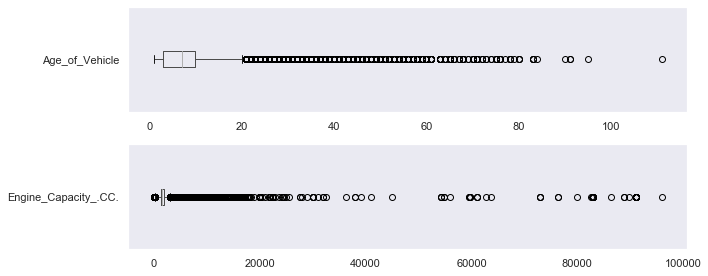

In [26]:
# plotting boxplots
sns.set(style='darkgrid')
fig, axes = plt.subplots(2,1, figsize=(10,4))

for ax, col in zip(axes, num_cols):
    df.boxplot(column=col, grid=False, vert=False, ax=ax)
    plt.tight_layout();

*Handling Outliers*

In [27]:
df['Engine_Capacity_.CC.'].describe()

count    1.704137e+06
mean     2.034436e+03
std      1.909883e+03
min      1.000000e+00
25%      1.299000e+03
50%      1.598000e+03
75%      1.997000e+03
max      9.600000e+04
Name: Engine_Capacity_.CC., dtype: float64

In [28]:
# phrasing condition
condition = (df['Engine_Capacity_.CC.'] < 20000)

# keep only records that meet the condition and don't fall within extreme outliers
df = df[condition]

*Binning Age_of_Vehicle Feature*

In [29]:
df['Age_of_Vehicle'].describe()

count    1.704053e+06
mean     7.113771e+00
std      4.706848e+00
min      1.000000e+00
25%      3.000000e+00
50%      7.000000e+00
75%      1.000000e+01
max      1.110000e+02
Name: Age_of_Vehicle, dtype: float64

In [30]:
age_of_vehicle_bins = {1: '1 to <2 years', 
                       2: '2 to <3 years', 
                       3: '3 to <7 years', 
                       4: '7 to <10 years', 
                       5: '>=10 years'}

In [31]:
# arguments in bins parameter denote left edge of each bin
df['Age_of_Vehicle'] = np.digitize(df['Age_of_Vehicle'], bins=[1,2,3,7,10])

# convert into categorical column
df['Age_of_Vehicle'] = df['Age_of_Vehicle'].astype('category')

# check the count within each bucket
df['Age_of_Vehicle'].value_counts().sort_index()

1    167816
2    150202
3    529340
4    356331
5    500364
Name: Age_of_Vehicle, dtype: int64

In [32]:
# re-define numerical feature columns - only one left
num_cols = ['Engine_Capacity_.CC.']

*Feature Scaling*

If you use a distance based algorithm and your numerical features’ range vary widely, the algorithm won’t work properly unless the range of all features is normalized.

Tree based models, which we will use here, are not distance based and can handle varying ranges of features. Therefore scaling is not required.

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
#### 2.5. Handling Categorical Data
<a id='2.5. Handling Categorical Data'></a>

In [33]:
# define categorical feature columns
cat_cols = ['Daytime', 'Speed_limit', 'Urban_or_Rural_Area',
            'Age_Band_of_Driver', 'Age_of_Vehicle', 'Sex_of_Driver', 'Vehicle_Manoeuvre']

# define target col
target_col = ['Accident_Severity']

cols = cat_cols + num_cols + target_col

# copy dataframe - just to be safe
df_model = df[cols].copy()
df_model.shape

(1704053, 9)

*Encoding categorical features*

In [34]:
# create dummy variables from the categorical features
dummies = pd.get_dummies(df_model[cat_cols], drop_first=True)
df_model = pd.concat([df_model[num_cols], df_model[target_col], dummies], axis=1)
df_model.shape

(1704053, 51)

In [35]:
df_model.isna().sum().sum()

0

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
### 3. Modeling the Data
<a id='3. Modeling the Data'></a>

#### 3.1. Train-Test-Split
<a id='3.1. Train-Test-Split'></a>

In [39]:
# define our features 
features = df_model.drop(['Accident_Severity'], axis=1)

# define our target
target = df_model[['Accident_Severity']]

In [40]:
from sklearn.model_selection import train_test_split

# split our data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

#### 3.2. Handling Imbalanced Classes
<a id='3.2. Handling Imbalanced Classes'></a>

If we have a target vector with highly imbalanced classes ...

In [41]:
df_model['Accident_Severity'].value_counts(normalize=True)

Slight     0.859266
Serious    0.127227
Fatal      0.013508
Name: Accident_Severity, dtype: float64

... and we can't apply the best strategy and simply can't collect more data, especially from the minority class, we need to find other ways to deal with imbalanced classes.

- A second strategy is to use a model evaluation metric better suited to imbalances classes: confusion matrices, precision, recall, F1 scores, or ROC curves instead of accuracy.
- A third strategy is to use the class weighing parameter included in implementations of some models. This allows us to have the algorithm adjust for imbalanced classes.
- The fourth and fifth strategies are related: downsampling and upsampling. Several of these resampling stratgies are well summarized in this [blog post by Chris Remmel](https://calremmel.github.io/fraud-detection-part-one.html).

Let's focus on class **weight parameters**: The Random Forest Classifier we will use now is a popular classification algorithm and includes a `class_weight` parameter.

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
#### 3.3. Training and Evaluating Random Forest Classifier with class_weight
<a id='3.3. Training and Evaluating Random Forest Classifier with class_weight'></a>

In [42]:
# import classifier
from sklearn.ensemble import RandomForestClassifier

# import metrics
from sklearn.metrics import classification_report, confusion_matrix

# import evaluation tools
from sklearn.model_selection import KFold, cross_val_score

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [43]:
# instantiate RandomForestClassifier with entropy and class_weight
forest_1 = RandomForestClassifier(random_state=4, criterion='entropy', n_jobs=-1, class_weight='balanced')

# train
forest_1.fit(X_train, y_train)

# predict
y_test_preds  = forest_1.predict(X_test)

# evaluate
report = classification_report(y_test, y_test_preds)
print('Classification Report Random Forest - with Entropy and class_weight Parameter: \n', report)

Classification Report Random Forest - with Entropy and class_weight Parameter: 
              precision    recall  f1-score   support

      Fatal       0.03      0.09      0.04      4718
    Serious       0.16      0.24      0.19     43331
     Slight       0.87      0.79      0.83    292762

avg / total       0.77      0.71      0.74    340811



In [44]:
# cross-validation with F1 score (more appropriate to imbalanced classes)
cross_val_score(forest_1, X_train, y_train, scoring='f1_macro', n_jobs=-1)

array([0.35623736, 0.35522625, 0.35525833])

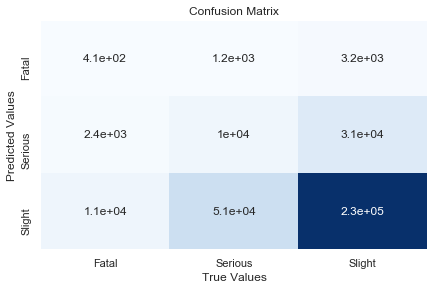

In [45]:
# create confusion matrix# create confusion matrix
matrix = confusion_matrix(y_test, y_test_preds)

# create dataframe
class_names = df_model.Accident_Severity.values
dataframe = pd.DataFrame(matrix, index=['Fatal', 'Serious', 'Slight'], 
                         columns=['Fatal', 'Serious', 'Slight'])

# create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
#### 3.4. Training and Evaluating Random Forest Classifier with SMOTE
<a id='3.4. Training and Evaluating Random Forest Classifier with SMOTE'></a>

The Random Forest using the `weight_class` parameter did not perform very well on classifying the severity. So let's try one of the resampling strategies to deal properly with our imbalances target classes: **Synthetic Minority Over-sampling Technique (SMOTE)**. Here we're repeatedly sample with replacement from the minority class to make it of equal size as the majority class. To be more specific: We're creating new synthetic data for the minority class - that is representative but not exact duplicate - using K-Nearest Neighbors.

In [46]:
from imblearn.over_sampling import SMOTE


In [47]:
# view previous class distribution
print('Before Upsampling with SMOTE:'), print(target['Accident_Severity'].value_counts())

# resample data ONLY using training data
X_resampled, y_resampled = SMOTE().fit_sample(X_train, y_train) 

# view synthetic sample class distribution
print('\nAfter Upsampling with SMOTE:'), print(pd.Series(y_resampled).value_counts())

Before Upsampling with SMOTE:
Slight     1464234
Serious     216801
Fatal        23018
Name: Accident_Severity, dtype: int64

After Upsampling with SMOTE:
Slight     1171472
Serious    1171472
Fatal      1171472
dtype: int64


(None, None)

In [48]:
# then perform ususal train-test-split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=0)

In [49]:
# instantiate second RandomForestClassifier with entropy and SMOTE
forest_2 = RandomForestClassifier(random_state=4, criterion='entropy', n_jobs=-1)

# train
forest_2.fit(X_train, y_train)

# predict
y_test_preds = forest_2.predict(X_test)

# evaluate
report = classification_report(y_test, y_test_preds)
print('Classification Report Random Forest - with Entropy and SMOTE Upsampling: \n', report)

Classification Report Random Forest - with Entropy and SMOTE Upsampling: 
              precision    recall  f1-score   support

      Fatal       0.92      0.97      0.94    292976
    Serious       0.84      0.78      0.80    292603
     Slight       0.84      0.86      0.85    293025

avg / total       0.87      0.87      0.87    878604



In [50]:
# cross-validation with F1 score (more appropriate to imbalanced classes)
cross_val_score(forest_2, X_train, y_train, scoring='f1_macro', n_jobs=-1)

array([0.85191661, 0.85133498, 0.85143267])

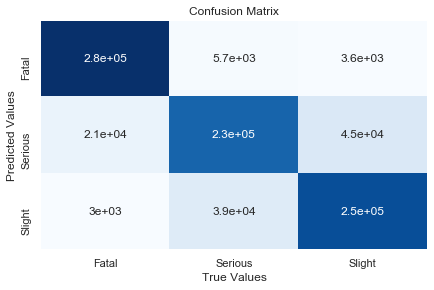

In [51]:
# create confusion matrix
matrix = confusion_matrix(y_test, y_test_preds)

# create dataframe
class_names = df_model.Accident_Severity.values
dataframe = pd.DataFrame(matrix, index=['Fatal', 'Serious', 'Slight'], 
                         columns=['Fatal', 'Serious', 'Slight'])

# create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()

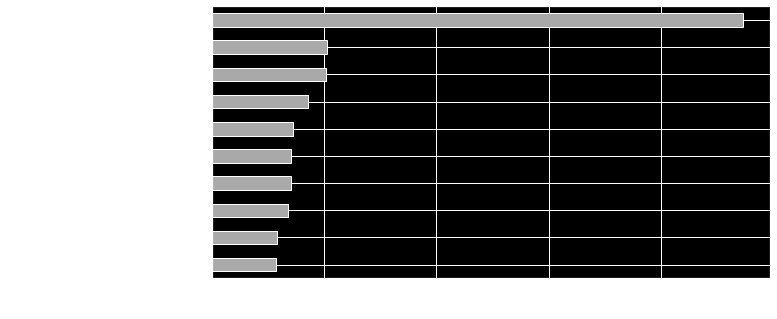

In [52]:
# plot the important features
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline

feat_importances = pd.Series(forest_2.feature_importances_, index=features.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh', color='darkgrey', figsize=(10,5))
plt.xlabel('Relative Feature Importance with Random Forest');
plt.show()